# **ARTIFICIAL INTELLIGENCE & CHATBOT**
---

**CHECKPOINT 6** - Análise Exploratória e Modelo Não Supervisionado

**PROF:** Felipe Souza Amaral

**ALUNA:** Marina Yumi Kanadani | **RM:** 558404 | **TURMA:** 1TDSPX

**FIAP | NOVEMBRO | 2024**

---

# **DATASET** _"IGN GAMES FROM BEST TO WORST"_

---

**ESCOLHA DO DATASET**

---

Escolhi o dataset do Kaggle _"IGN games from best to worst"_ por interesse pessoal e pelas seguintes características:
- *Usability:* 10.00
- *Update:* 07/11/2024
- *Densidade de Dados:* 12589 valores únicos de títulos de jogos

---

**DEFINIÇÃO DOS OBJETIVOS**

---

- Agrupar jogos segundo gênero, plataforma e nota: identificar segmentos de jogos com características similares.
- Agrupar jogos segundo gênero e data de lançamento: observar quais gêneros se popularizaram mais em determinados períodos.
- Agrupar jogos segundo gênero e nota: avaliar relação entre gêneros e notas.

---


# **ANÁLISE EXPLORATÓRIA**

---

**BIBLIOTECAS**

---

Iniciaremos carregando as bibliotecas necessárias.

In [273]:
# Análise e manipulação de dados
import pandas as pd
import numpy as np

# Construção de gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Avaliação de desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score

---

**DATASET**

---

Agora, vamos carregar o dataset e exibir as primeiras linhas.

In [274]:
# Carrega o dataset
df = pd.read_csv('ign-games.csv')
df.head()

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25


---

**TRADUÇÃO**

---

Vamos traduzir os nomes das colunas e das variáveis categórias (exceto títulos e plataformas, que não precisam ser traduzidos).

Primeiro, vamos separar as colunas das variáveis categóricas cujos valores desejamos traduzir: 'score_phrase' e 'genre'.

In [275]:
# Obtém os valores únicos para 'score_phrase' apenas
categorias_unicas_notas = df['score_phrase'].unique()

# Exibe as categorias únicas de notas
print("Categorias únicas de notas encontradas:")
print(categorias_unicas_notas)

# Cria um conjunto para armazenar todos os gêneros únicos
generos_unicos = set()

# Itera sobre os valores na coluna 'genre' e adiciona gêneros únicos ao conjunto
for generos in df['genre'].dropna():
    for genero in generos.split(', '):
        generos_unicos.add(genero.strip())

# Exibe os gêneros únicos
print("Gêneros únicos encontrados:")
print(np.array(list(generos_unicos)))

Categorias únicas de notas encontradas:
['Masterpiece' 'Amazing' 'Great' 'Good' 'Okay' 'Mediocre' 'Bad' 'Awful'
 'Painful' 'Unbearable' 'Disaster']
Gêneros únicos encontrados:
['Baseball' 'Editor' 'Platformer' 'Action' 'Compilation' 'Card' 'Party'
 'Adventure' 'Simulation' 'Other' 'First-Person' 'Casino' 'Strategy'
 'Golf' 'Battle' 'Sports' 'Fighting' 'Virtual Pet' 'Music' 'Racing'
 'Episodic' 'Wrestling' 'Board' 'Productivity' 'Hardware' 'Hunting'
 'Word Game' 'Flight' 'Pinball' 'Puzzle' 'Educational' 'RPG' 'Adult'
 'Trivia' 'Shooter']


Agora, faremos os dicionários necessários.

In [276]:
# Dicionário para traduzir as colunas
traducao_colunas = {
    'title': 'Título',
    'score': 'Nota',
    'score_phrase': 'Categoria da Nota',
    'platform': 'Plataforma',
    'genre': 'Gênero',
    'release_year': 'Ano de Lançamento',
    'release_month': 'Mês de Lançamento',
    'release_day': 'Dia de Lançamento',
}

# Dicionários para traduzir os valores das variáveis categóricas
traducao_categoria_nota = {
    'Masterpiece': 'Obra-prima',
    'Amazing': 'Incrível',
    'Great': 'Ótimo',
    'Good': 'Bom',
    'Okay': 'Ok',
    'Mediocre': 'Medíocre',
    'Bad': 'Ruim',
    'Awful': 'Horrível',
    'Painful': 'Doloroso',
    'Unbearable': 'Insuportável',
    'Disaster': 'Desastre',
}

traducao_genero = {
    'Party': 'Multijogador',
    'Racing': 'Corrida',
    'Puzzle': 'Quebra-cabeça',
    'Shooter': 'Tiro',
    'Strategy': 'Estratégia',
    'Sports': 'Esportes',
    'Virtual Pet': 'Pet Virtual',
    'Music': 'Música',
    'Card': 'Cartas',
    'Word Game': 'Jogo de Palavras',
    'Adult': 'Adulto',
    'Wrestling': 'Luta Livre',
    'Battle': 'Batalha',
    'Adventure': 'Aventura',
    'Compilation': 'Compilação',
    'Board': 'Tabuleiro',
    'Golf': 'Golfe',
    'Hunting': 'Caça',
    'Episodic': 'Episódico',
    'Platformer': 'Plataforma',
    'Productivity': 'Produtividade',
    'Flight': 'Voo',
    'Pinball': 'Pinball',
    'Simulation': 'Simulação',
    'Action': 'Ação',
    'Casino': 'Cassino',
    'Editor': 'Editor',
    'Educational': 'Educativo',
    'Fighting': 'Luta',
    'Baseball': 'Beisebol',
    'First-Person': 'Primeira Pessoa',
    'Other': 'Outro',
}

Finalmente, vamos substituir os valores com as traduções e visualizar as primeiras linhas alteradas.

In [277]:
# Função para traduzir cada gênero, incluindo gêneros compostos
def traduzir_genero(genero):
    if pd.isna(genero):
        return genero
    return ', '.join([traducao_genero.get(g.strip(), g.strip()) for g in genero.split(',')])

# Aplica as traduções na coluna 'score_phrase'
df['score_phrase'] = df['score_phrase'].replace(traducao_categoria_nota)

# Aplica as traduções na coluna 'genre' usando a função personalizada para gêneros compostos
df['genre'] = df['genre'].apply(traduzir_genero)

# Aplica as traduções nos nomes das colunas
df.rename(columns=traducao_colunas, inplace=True)

# Exibe as primeiras linhas do dataset
print(df.head())

                Título  Nota Categoria da Nota      Plataforma  \
0       Checkered Flag  10.0        Obra-prima            Lynx   
1       Chrono Trigger  10.0        Obra-prima             Wii   
2   Dragon Warrior III  10.0        Obra-prima  Game Boy Color   
3  Grand Theft Auto IV  10.0        Obra-prima        Xbox 360   
4  Grand Theft Auto IV  10.0        Obra-prima   PlayStation 3   

           Gênero  Ano de Lançamento  Mês de Lançamento  Dia de Lançamento  
0         Corrida               1999                  7                  6  
1       Ação, RPG               2011                  5                 25  
2             RPG               2001                  7                 20  
3  Ação, Aventura               2008                  4                 25  
4  Ação, Aventura               2008                  4                 25  


---

**DESCRIÇÃO DOS DADOS**

---

Vamos exibir o número de linhas e colunas, seguido dos tipos de variáveis presentes.

In [278]:
# Número de linhas e colunas
num_linhas, num_colunas = df.shape
print(f"Número de linhas: {num_linhas}, Número de colunas: {num_colunas}")

# Descrição dos dados
print("\nInformações do dataset:")
df.info()

# Exibe colunas numéricas
colunas_numericas = df.select_dtypes(include=['number']).columns
print("\nColunas numéricas:", colunas_numericas)

# Exibe colunas categóricas
colunas_categoricas = df.select_dtypes(include=['object']).columns
print("\nColunas categóricas:", colunas_categoricas)

Número de linhas: 18625, Número de colunas: 8

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Título             18625 non-null  object 
 1   Nota               18625 non-null  float64
 2   Categoria da Nota  18625 non-null  object 
 3   Plataforma         18625 non-null  object 
 4   Gênero             18589 non-null  object 
 5   Ano de Lançamento  18625 non-null  int64  
 6   Mês de Lançamento  18625 non-null  int64  
 7   Dia de Lançamento  18625 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB

Colunas numéricas: Index(['Nota', 'Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento'], dtype='object')

Colunas categóricas: Index(['Título', 'Categoria da Nota', 'Plataforma', 'Gênero'], dtype='object')


---

**DADOS FALTANTES**

---

A seguir, vamos identificar e tratar os dados faltantes.

In [279]:
# Quantidade de células vazias por coluna
print("Presença de células vazias:")
print(df.isnull().sum())

Presença de células vazias:
Título                0
Nota                  0
Categoria da Nota     0
Plataforma            0
Gênero               36
Ano de Lançamento     0
Mês de Lançamento     0
Dia de Lançamento     0
dtype: int64


Considerando que há apenas 36 dados faltantes na coluna "Gênero", o que corresponde a somente 0,2% do dataset, optei por remover estas linhas.

In [280]:
# Remoção dos dados faltantes
df.dropna(subset=['Gênero'], inplace=True)

---

**ANÁLISE DESCRITIVA**

---

Faremos agora a análise descritiva dos dados.

Inicialmente, avaliaremos as variáveis numéricas.

In [281]:
# Estatísticas para variáveis numéricas
print("Estatísticas para variáveis numéricas:")
print(df.describe().round(2))

# Média (arredondada para datas)
print("\nMédia:")
media = df.mean(numeric_only=True)
print(media[['Nota']].round(2))
print(media[['Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].round(0).astype(int))

# Mediana (arredondada para datas)
print("\nMediana:")
mediana = df.median(numeric_only=True)
print(mediana[['Nota']].round(2))
print(mediana[['Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].round(0).astype(int))

# Máximo
print("\nMáximo:")
maximo = df[['Nota', 'Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].max()
print(maximo[['Nota']].round(2))
print(maximo[['Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].astype(int))

# Desvio Padrão (arredondado para exibição)
print("\nDesvio Padrão:")
desvio_padrao = df.std(numeric_only=True)
print(desvio_padrao[['Nota', 'Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']].round(2))


Estatísticas para variáveis numéricas:
           Nota  Ano de Lançamento  Mês de Lançamento  Dia de Lançamento
count  18589.00           18589.00           18589.00           18589.00
mean       6.95            2006.51               7.14              15.60
std        1.71               4.59               3.48               8.69
min        0.50            1970.00               1.00               1.00
25%        6.00            2003.00               4.00               8.00
50%        7.30            2007.00               8.00              16.00
75%        8.20            2010.00              10.00              23.00
max       10.00            2016.00              12.00              31.00

Média:
Nota    6.95
dtype: float64
Ano de Lançamento    2007
Mês de Lançamento       7
Dia de Lançamento      16
dtype: int64

Mediana:
Nota    7.3
dtype: float64
Ano de Lançamento    2007
Mês de Lançamento       8
Dia de Lançamento      16
dtype: int64

Máximo:
Nota    10.0
dtype: float64
Ano de Lança

Agora, veremos as variáveis categóricas.

In [282]:
# Distribuição de frequências para variáveis categóricas em porcentagem
print("Distribuição de frequências para variáveis categóricas (%): \n")

# Frequência de cada Categoria da Nota em porcentagem
print((df['Categoria da Nota'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

# Frequência de cada Plataforma em porcentagem
print()
print((df['Plataforma'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

# Frequência de cada Gênero em porcentagem
print()
print((df['Gênero'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

Distribuição de frequências para variáveis categóricas (%): 

Categoria da Nota
Ótimo           25.63%
Bom             25.42%
Ok              15.82%
Medíocre        10.53%
Incrível          9.7%
Ruim             6.82%
Horrível         3.56%
Doloroso         1.82%
Insuportável     0.39%
Obra-prima        0.3%
Desastre         0.02%
Name: proportion, dtype: object

Plataforma
PC                      18.11%
PlayStation 2            9.06%
Xbox 360                 8.77%
Wii                      7.33%
PlayStation 3            7.29%
Nintendo DS              5.62%
PlayStation              5.12%
Wireless                 4.87%
iPhone                   4.45%
Xbox                     4.42%
PlayStation Portable      3.4%
Game Boy Advance         3.35%
GameCube                 2.74%
Game Boy Color           1.92%
Nintendo 64              1.62%
Dreamcast                1.54%
PlayStation 4            1.49%
Nintendo DSi             1.36%
Nintendo 3DS             1.19%
Xbox One                 1.12%
Pla


Por fim, vamos visualizar quais notas correspondem a cada categoria de nota.

In [283]:
# Agrupa as notas por Categoria da Nota e calcula o valor mínimo e máximo para cada uma
intervalo_notas_por_categoria = df.groupby('Categoria da Nota')['Nota'].agg(['min', 'max']).reset_index()

# Renomeia as colunas min e max para Nota Mínima e Nota Máxima
intervalo_notas_por_categoria = intervalo_notas_por_categoria.rename(columns={'min': 'Nota Mínima', 'max': 'Nota Máxima'})

# Ordena a tabela pelo valor mínimo da nota em ordem decrescente
intervalo_notas_por_categoria = intervalo_notas_por_categoria.sort_values(by='Nota Mínima', ascending=False).reset_index(drop=True)

# Exibe a tabela de intervalo de notas por categoria
print("Intervalo de Notas por Categoria da Nota:\n")
print(intervalo_notas_por_categoria.to_string(index=False))

Intervalo de Notas por Categoria da Nota:

Categoria da Nota  Nota Mínima  Nota Máxima
       Obra-prima         10.0         10.0
         Incrível          9.0          9.9
            Ótimo          8.0          8.9
              Bom          7.0          7.9
               Ok          6.0          6.9
         Medíocre          5.0          5.9
             Ruim          4.0          4.9
         Horrível          3.0          3.9
         Doloroso          2.0          2.9
     Insuportável          1.0          1.9
         Desastre          0.5          0.8


---

**REPRESENTAÇÕES GRÁFICAS**

---

Agora, facilitaremos a visualização dos dados por meio de gráficos.

--- *Distribuição de Variáveis Categóricas* ---

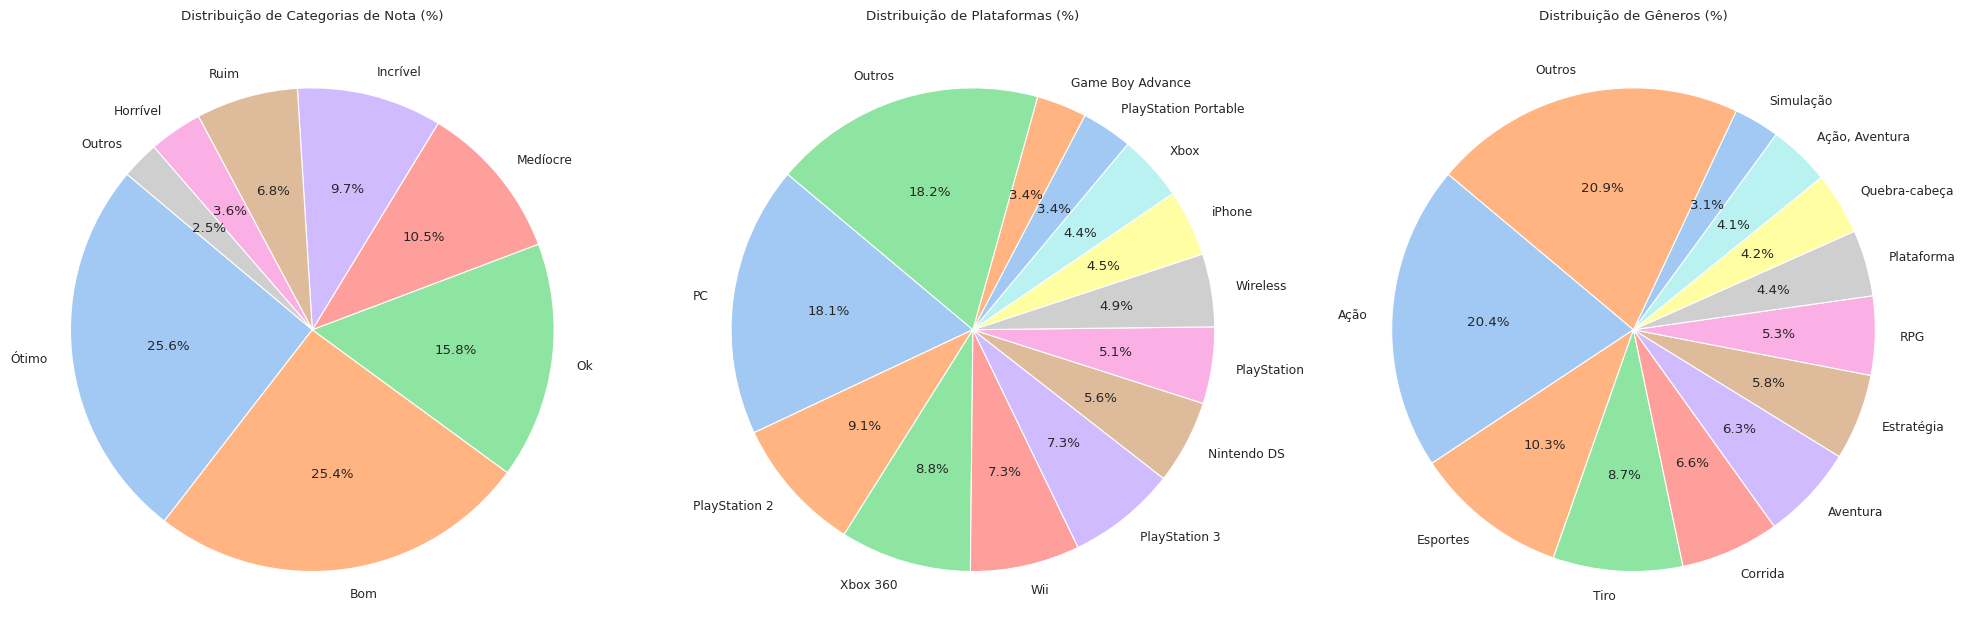

In [284]:
# ESTILO
sns.set_theme(context='paper', style='darkgrid', palette='pastel', font_scale=1)

# Função para gerar gráficos de pizza com agrupamento de valores pequenos
def grafico_pizza(data, ax, title, threshold=3):
    # Agrupa valores menores que o threshold em "Outros"
    data = data.sort_values(ascending=False)
    soma_valores_baixos = data[data < threshold].sum()
    data = data[data >= threshold]
    if soma_valores_baixos > 0:
        data = pd.concat([data, pd.Series({'Outros': soma_valores_baixos})])

    # Plotando o gráfico de pizza
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)

# Distribuição de frequência para cada variável em porcentagem
score_dist = df['Categoria da Nota'].value_counts(normalize=True) * 100
platform_dist = df['Plataforma'].value_counts(normalize=True) * 100
genre_dist = df['Gênero'].value_counts(normalize=True) * 100

# Configuração da grade de gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # 1 linha, 3 colunas

# GRÁFICOS DE PIZZA com agrupamento de valores pequenos
grafico_pizza(score_dist, axes[0], "Distribuição de Categorias de Nota (%)", threshold=3)
grafico_pizza(platform_dist, axes[1], "Distribuição de Plataformas (%)", threshold=3)
grafico_pizza(genre_dist, axes[2], "Distribuição de Gêneros (%)", threshold=3)

plt.tight_layout()
plt.show()


--- *Jogos x Categoria da Nota* ---

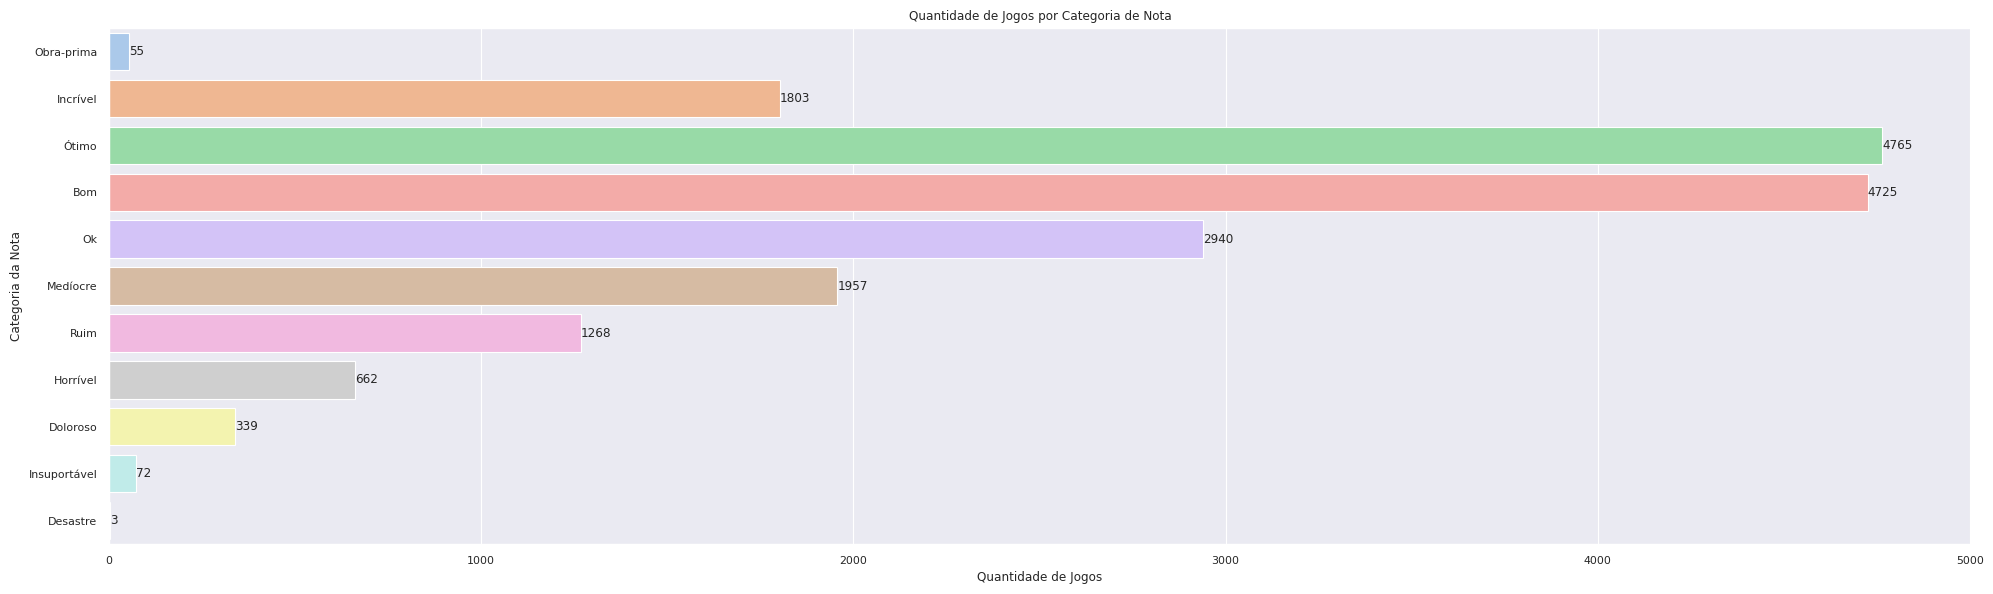

In [285]:
# ESTILO
sns.set_theme(context='paper', style='darkgrid', font_scale=0.9)

# Define a ordem específica das categorias de nota
ordem_categorias = [
    "Obra-prima", "Incrível", "Ótimo", "Bom", "Ok",
    "Medíocre", "Ruim", "Horrível", "Doloroso",
    "Insuportável", "Desastre"
]

# Conta a quantidade de jogos por categoria de nota e organiza na ordem desejada
contagem_categorias = df['Categoria da Nota'].value_counts().reindex(ordem_categorias, fill_value=0).reset_index()
contagem_categorias.columns = ['Categoria da Nota', 'Quantidade']

# GRÁFICO DE BARRAS horizontal para exibir todas as categorias de forma compacta e legível
plt.figure(figsize=(20, 6))
sns.barplot(data=contagem_categorias, y='Categoria da Nota', x='Quantidade', hue='Categoria da Nota', palette='pastel')
plt.title('Quantidade de Jogos por Categoria de Nota')
plt.xlabel('Quantidade de Jogos')
plt.ylabel('Categoria da Nota')

# Exibe as contagens nas barras para mostrar valores muito pequenos
for index, row in contagem_categorias.iterrows():
    plt.text(row['Quantidade'] + 0.1, index, int(row['Quantidade']), va='center')

plt.tight_layout()
plt.show()

--- *Jogos x Plataforma* ---

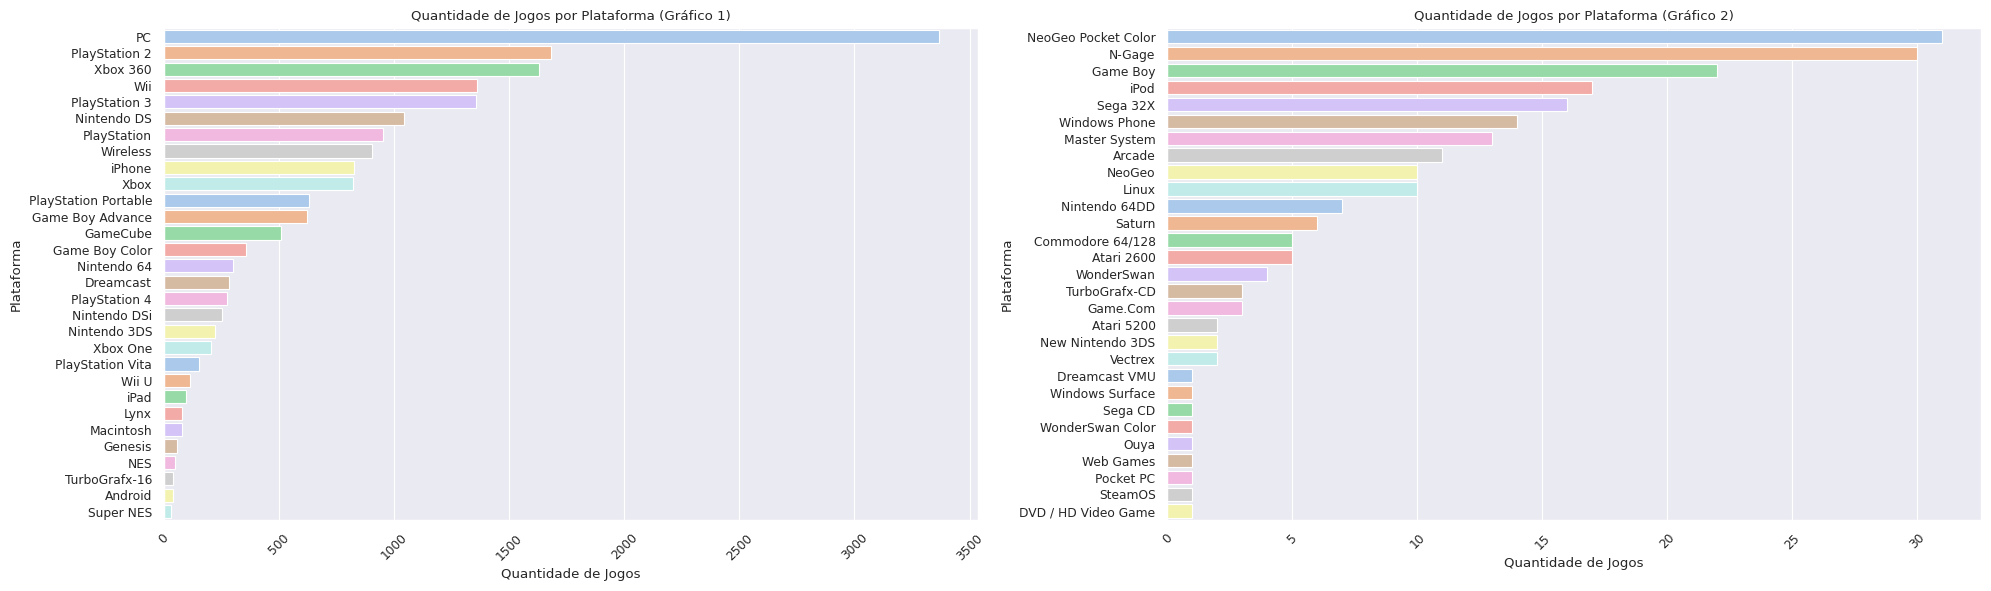

In [286]:
# ESTILO
sns.set_theme(context='paper', style='darkgrid', font_scale=1)

# Conta a quantidade de jogos por plataforma
contagem_plataformas = df['Plataforma'].value_counts().reset_index()
contagem_plataformas.columns = ['Plataforma', 'Quantidade']

# Define o número total de gráficos e divide as plataformas por gráfico igualmente
num_graficos = 2
plataformas_por_grafico = (len(contagem_plataformas) + num_graficos - 1) // num_graficos

# Configura para exibir os gráficos em uma grade de 2 colunas
fig, axes = plt.subplots(nrows=(num_graficos + 1) // 2, ncols=2, figsize=(20, 6 * ((num_graficos + 1) // 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta o espaço entre os gráficos

# GRÁFICOS DE BARRAS para cada conjunto de plataformas
for idx, ax in enumerate(axes.flat[:num_graficos]):

    # Seleciona a parte dos dados para o gráfico atual
    start = idx * plataformas_por_grafico
    end = start + plataformas_por_grafico
    parte = contagem_plataformas.iloc[start:end]
    sns.barplot(data=parte, x='Quantidade', y='Plataforma', ax=ax, hue='Plataforma', palette='pastel')
    ax.set_title(f'Quantidade de Jogos por Plataforma (Gráfico {idx+1})')
    ax.set_xlabel('Quantidade de Jogos')
    ax.set_ylabel('Plataforma')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

--- *Jogos x Gênero* ---

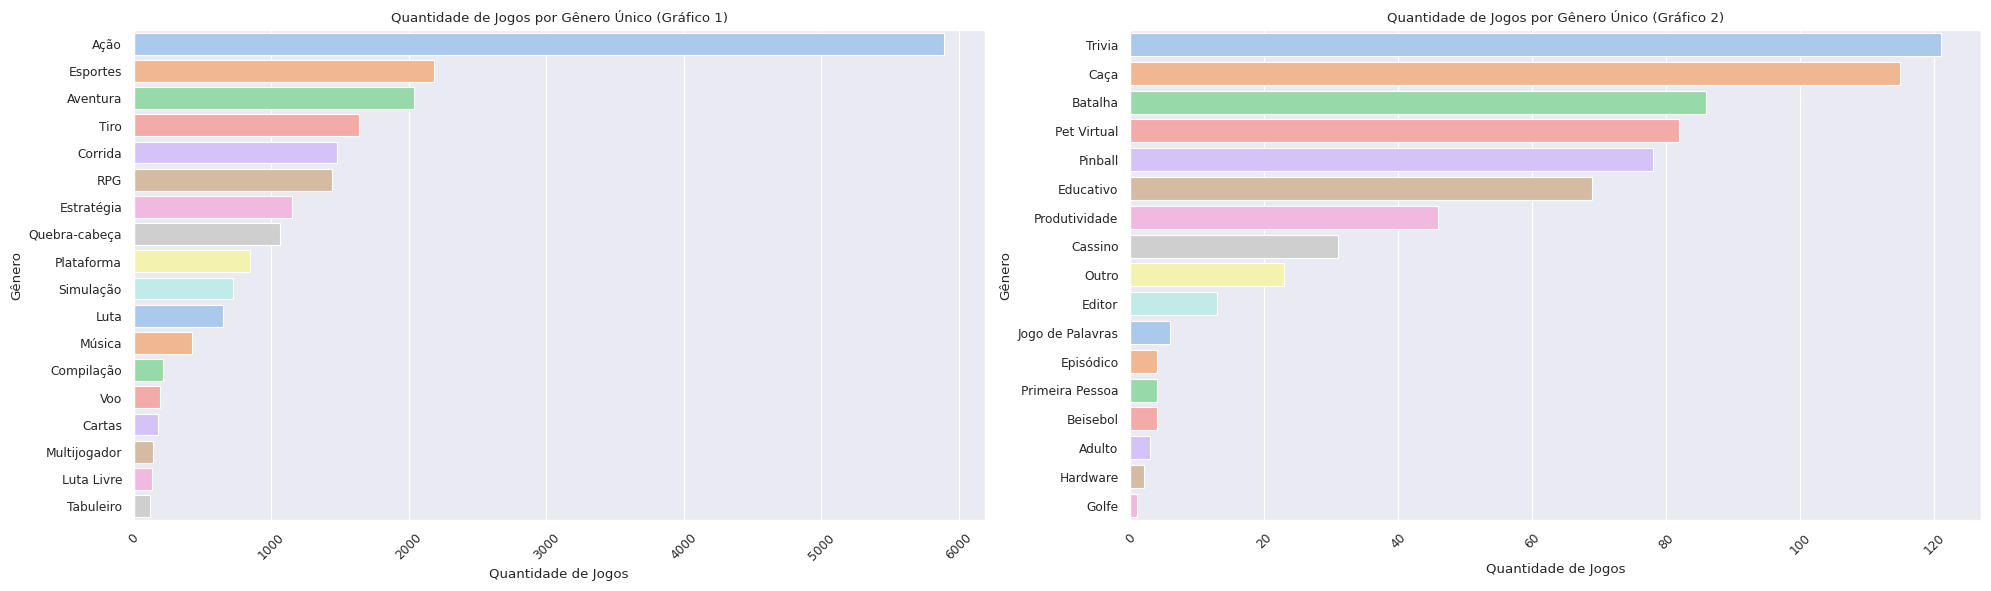

In [287]:
# ESTILO
sns.set_theme(context='paper', style='darkgrid', font_scale=1)

# Separa gêneros em linhas individuais e conta cada gênero
generos_expandidos = df['Gênero'].dropna().str.split(', ').explode()
contagem_generos_unicos = generos_expandidos.value_counts().reset_index()
contagem_generos_unicos.columns = ['Gênero', 'Quantidade']

# Define o número total de gráficos e divide os gêneros por gráfico igualmente
num_graficos = 2
generos_por_grafico = (len(contagem_generos_unicos) + num_graficos - 1) // num_graficos

# Configura para exibir os gráficos em uma grade de 2 colunas
fig, axes = plt.subplots(nrows=(num_graficos + 1) // 2, ncols=2, figsize=(20, 6 * ((num_graficos + 1) // 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta o espaço entre os gráficos

# GRÁFICOS DE BARRAS para cada conjunto de gêneros
for idx, ax in enumerate(axes.flat[:num_graficos]):

    # Seleciona a parte dos dados para o gráfico atual
    start = idx * generos_por_grafico
    end = start + generos_por_grafico
    parte = contagem_generos_unicos.iloc[start:end]
    sns.barplot(data=parte, x='Quantidade', y='Gênero', ax=ax, hue='Gênero', palette='pastel')
    ax.set_title(f'Quantidade de Jogos por Gênero Único (Gráfico {idx+1})')
    ax.set_xlabel('Quantidade de Jogos')
    ax.set_ylabel('Gênero')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

--- *Jogos x Ano* ---

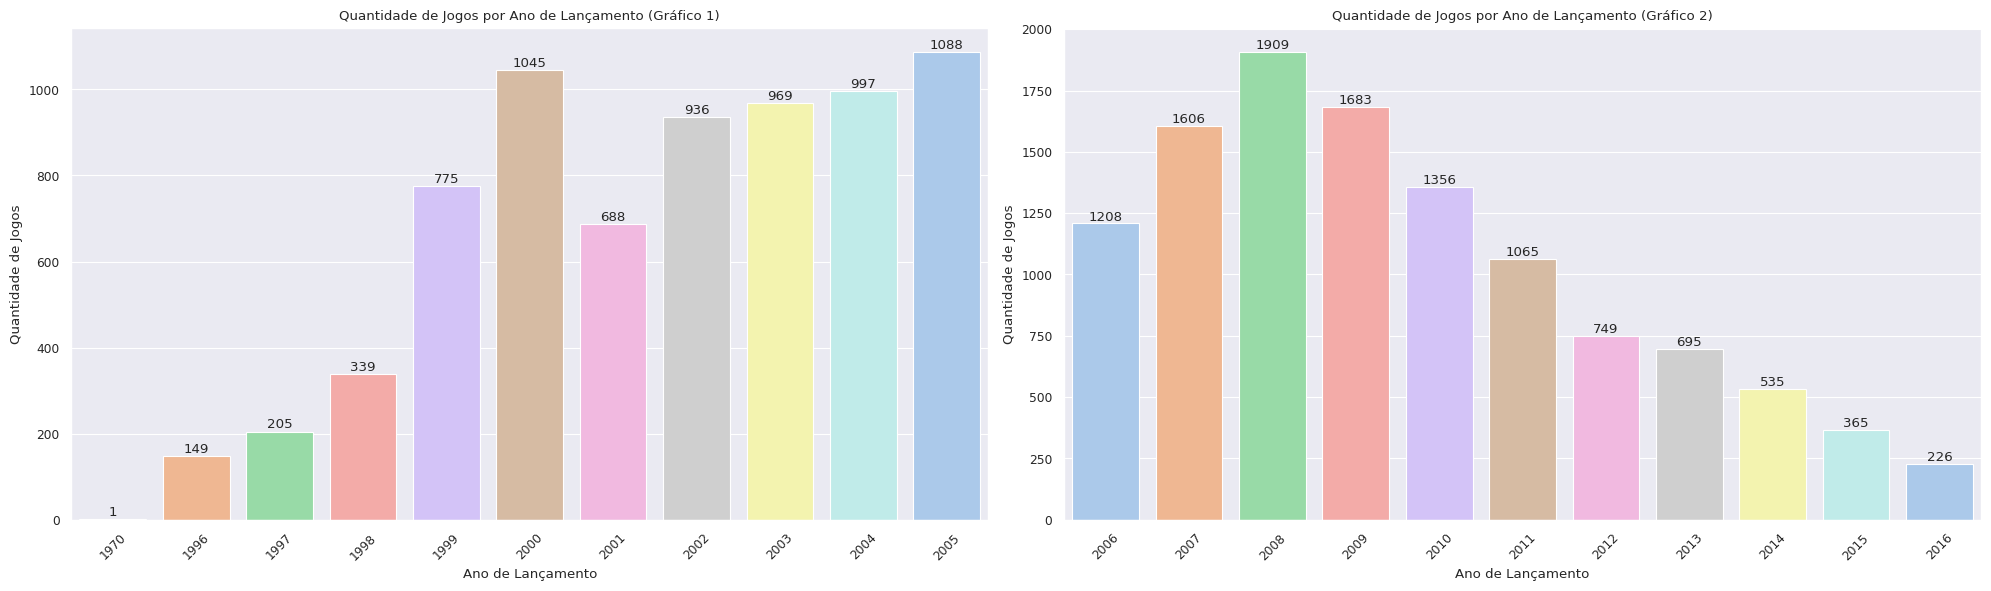

In [288]:
# ESTILO
sns.set_theme(context='paper', style='darkgrid', font_scale=1)

# Conta a quantidade de jogos por ano de lançamento e organiza em ordem crescente
contagem_anos = df['Ano de Lançamento'].value_counts().sort_index().reset_index()
contagem_anos.columns = ['Ano de Lançamento', 'Quantidade']

# Define o número total de gráficos e divide os anos por gráfico igualmente
num_graficos = 2
anos_por_grafico = (len(contagem_anos) + num_graficos - 1) // num_graficos

# Configura para exibir os gráficos em uma grade de 2 colunas
fig, axes = plt.subplots(nrows=(num_graficos + 1) // 2, ncols=2, figsize=(20, 6 * ((num_graficos + 1) // 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta o espaço entre os gráficos

# GRÁFICOS DE BARRAS para cada conjunto de anos
for idx, ax in enumerate(axes.flat[:num_graficos]):

    # Seleciona a parte dos dados para o gráfico atual
    start = idx * anos_por_grafico
    end = start + anos_por_grafico
    parte = contagem_anos.iloc[start:end]
    sns.barplot(data=parte, x='Ano de Lançamento', y='Quantidade', ax=ax, hue='Ano de Lançamento', palette='pastel', legend=False)
    ax.set_title(f'Quantidade de Jogos por Ano de Lançamento (Gráfico {idx+1})')
    ax.set_xlabel('Ano de Lançamento')
    ax.set_ylabel('Quantidade de Jogos')
    ax.tick_params(axis='x', rotation=45)

    # Exibe as contagens nas barras para mostrar valores muito pequenos
    for i, row in enumerate(parte.itertuples()):
        ax.text(i, row.Quantidade + 0.5, int(row.Quantidade), ha='center', va='bottom')

plt.tight_layout()
plt.show()

--- *Jogos x Mês* ---

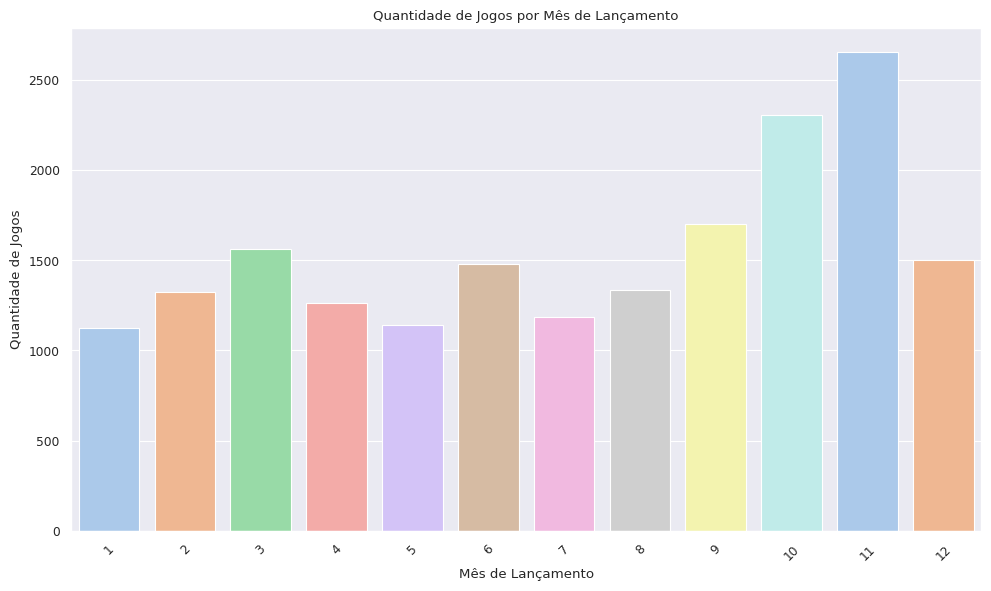

In [289]:
# ESTILO
sns.set_theme(context='paper', style='darkgrid', font_scale=1)

# Conta a quantidade de jogos por mês
contagem_meses = df['Mês de Lançamento'].value_counts().sort_index().reset_index()
contagem_meses.columns = ['Mês', 'Quantidade']

# GRÁFICO DE BARRAS para a quantidade de jogos por mês
plt.figure(figsize=(10, 6))
sns.barplot(data=contagem_meses, x='Mês', y='Quantidade', hue='Mês', palette='pastel', legend=False)
plt.title('Quantidade de Jogos por Mês de Lançamento')
plt.xlabel('Mês de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

--- *Jogos x Dia de Lançamento* ---



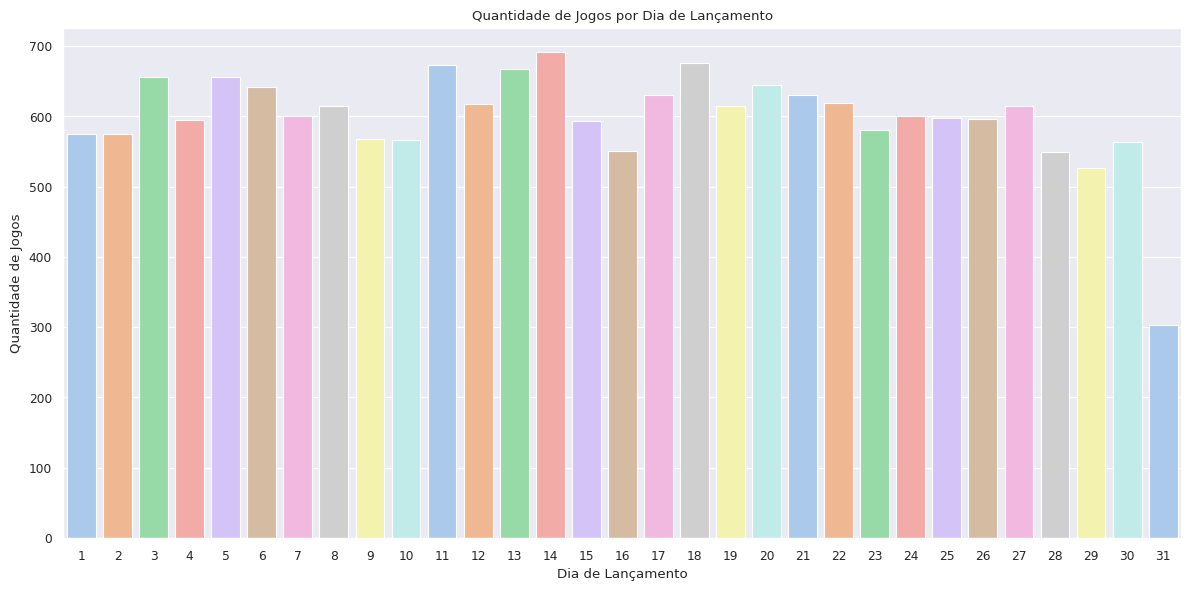

In [293]:
# ESTILO
sns.set_theme(context='paper', style='darkgrid', font_scale=1)

# Conta a quantidade de jogos para cada dia do mês
contagem_dias = df['Dia de Lançamento'].value_counts().sort_index().reset_index()
contagem_dias.columns = ['Dia', 'Quantidade']

# GRÁFICO DE BARRAS para a quantidade de jogos por dia do mês
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=contagem_dias, x='Dia', y='Quantidade', hue='Dia', palette='pastel', legend=False)
plt.title('Quantidade de Jogos por Dia de Lançamento')
plt.xlabel('Dia de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.tight_layout()
plt.show()


--- *Jogos x Data* ---

In [298]:
# ESTILO
sns.set_theme(context='paper', style='darkgrid', font_scale=1)

# Verifica a presença das colunas e substitui valores ausentes por NaN
for col in ['Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']:
    if col not in df.columns:
        raise ValueError(f"A coluna '{col}' não existe no DataFrame.")
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converte para numérico e força NaN em valores inválidos

# Cria a coluna 'Data de Lançamento' com base nas colunas de dia, mês e ano
df['Data de Lançamento'] = pd.to_datetime(df[['Ano de Lançamento', 'Mês de Lançamento', 'Dia de Lançamento']], errors='coerce')

# Filtra para anos mais recentes (após 1990)
df_filtrado = df[df['Data de Lançamento'].dt.year >= 1990]

# Conta a quantidade de jogos por data de lançamento
contagem_lancamentos = df_filtrado['Data de Lançamento'].value_counts().sort_index()

# GRÁFICO DE DISPERSÃO para lançamentos por data
plt.figure(figsize=(18, 14))
sns.scatterplot(x=contagem_lancamentos.index, y=contagem_lancamentos.values, alpha=0.5, s=20)
plt.title('Dispersão de Jogos por Data de Lançamento (após 1990)')
plt.xlabel('Data de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe os 3 dias com mais lançamentos (outliers)
top_dias_lancamentos = contagem_lancamentos.sort_values(ascending=False).head(3)
top_dias_lancamentos


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

--- *Outliers* ---

Possíveis explicações para os *outliers* observados são:

*6 de julho de 1999:*
* Em 1999, houve um aumento nos lançamentos de jogos devido ao crescimento de consoles populares como o PlayStation e o Nintendo 64.
* Período de férias de verão nos Estados Unidos, quando o consumo de entretenimento aumenta.

*25 de novembro de 1996 e 21 de novembro de 1996:*

* Datas próximas ao feriado de Ação de Graças nos EUA, uma das épocas de maior consumo no país. Muitas empresas de jogos programam lançamentos para esta época para maximizar as vendas.
* Em 1996, o Nintendo 64 foi lançado globalmente e diversos títulos foram
disponibilizados para o console, justificando a grande quantidade de lançamentos.

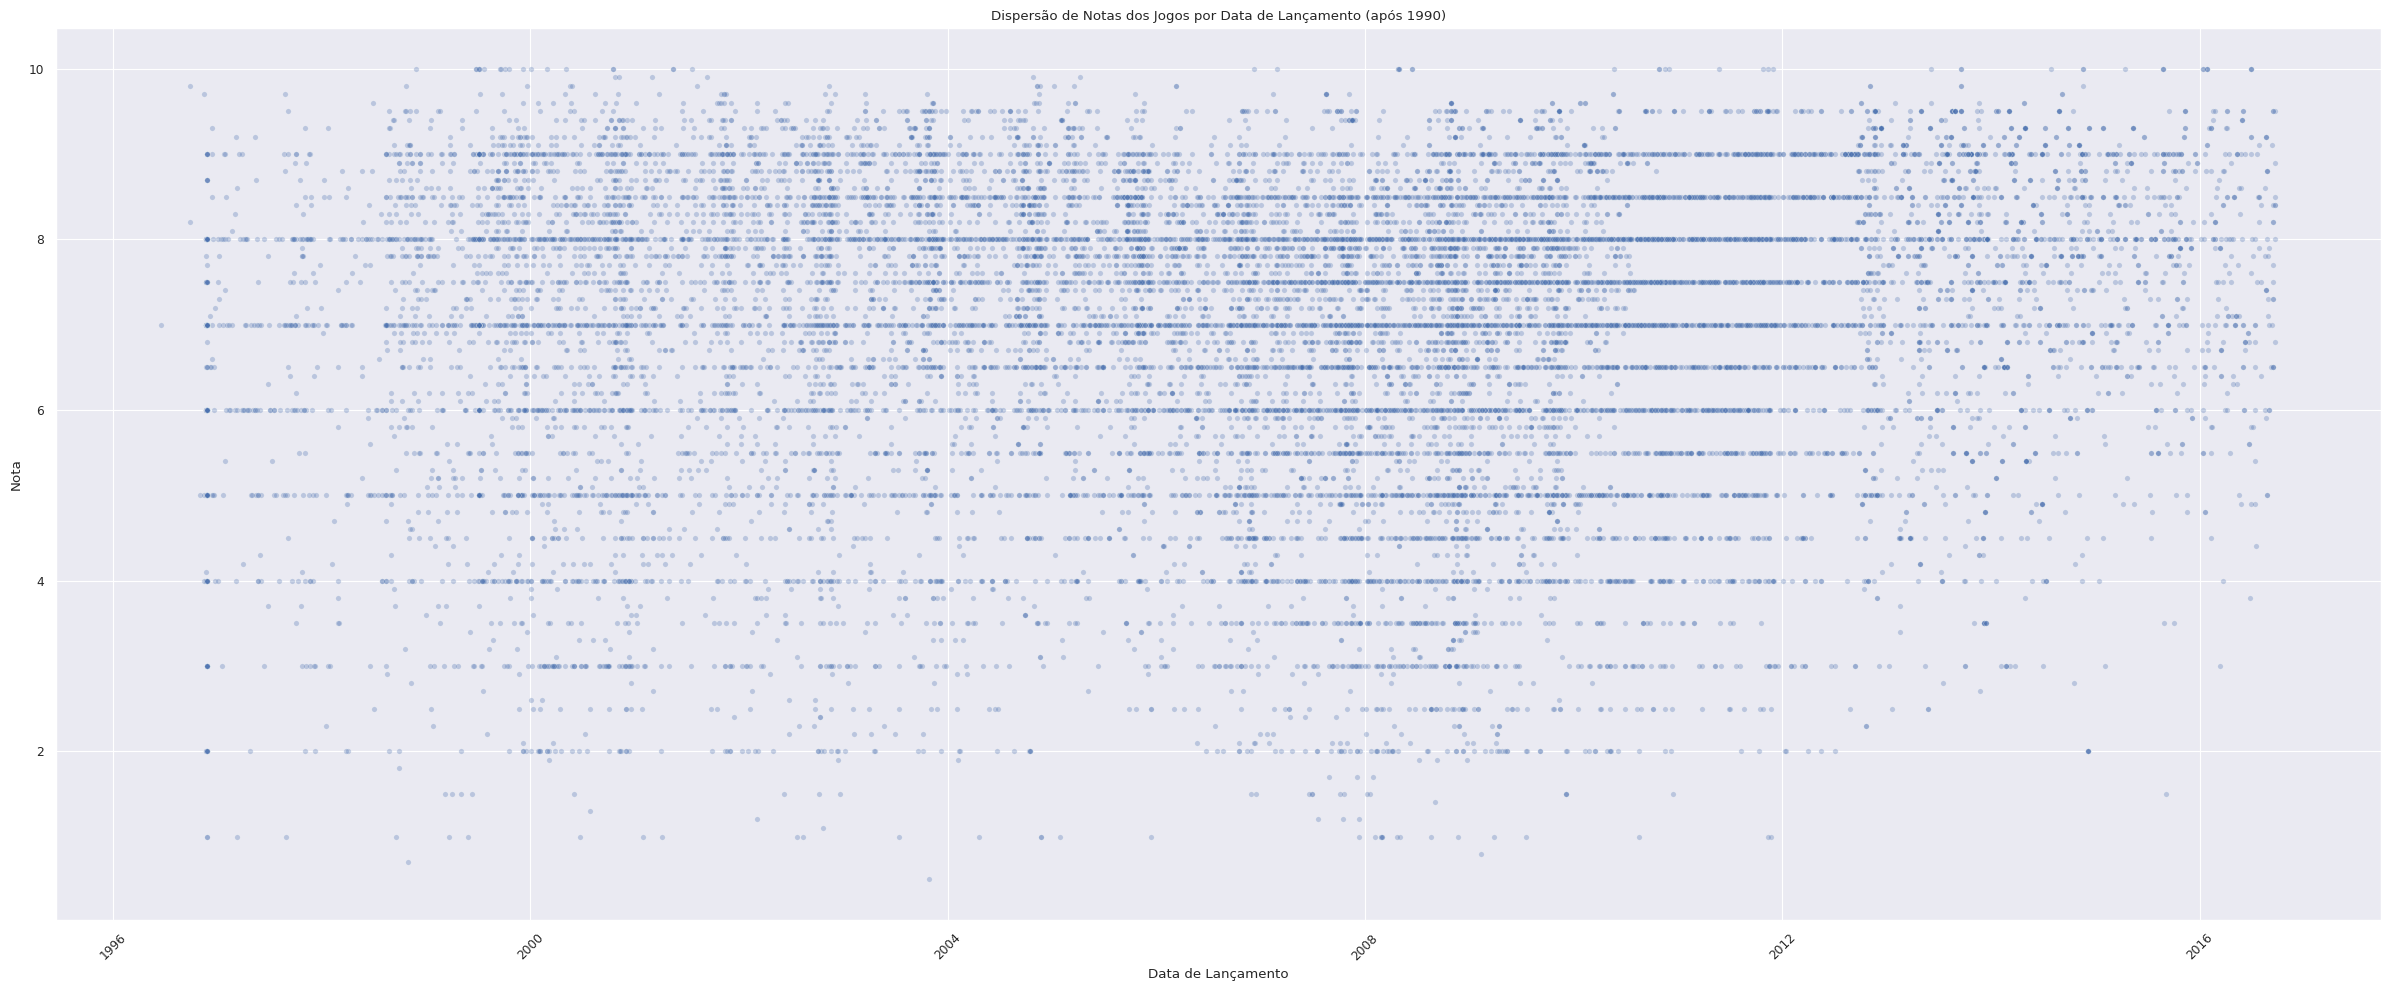

In [207]:
# ESTILO
sns.set_theme(context='paper', style='darkgrid', font_scale=1)

# Filtra para anos mais recentes (após 1990)
df_filtrado = df[df['Data de Lançamento'].dt.year >= 1990]

# GRÁFICO DE DISPERSÃO para Notas por Data de Lançamento
plt.figure(figsize=(24, 10))
sns.scatterplot(x=df_filtrado['Data de Lançamento'], y=df_filtrado['Nota'], alpha=0.3, s=15)
plt.title('Dispersão de Notas dos Jogos por Data de Lançamento (após 1990)')
plt.xlabel('Data de Lançamento')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

--- *Jogos x Notas* ---

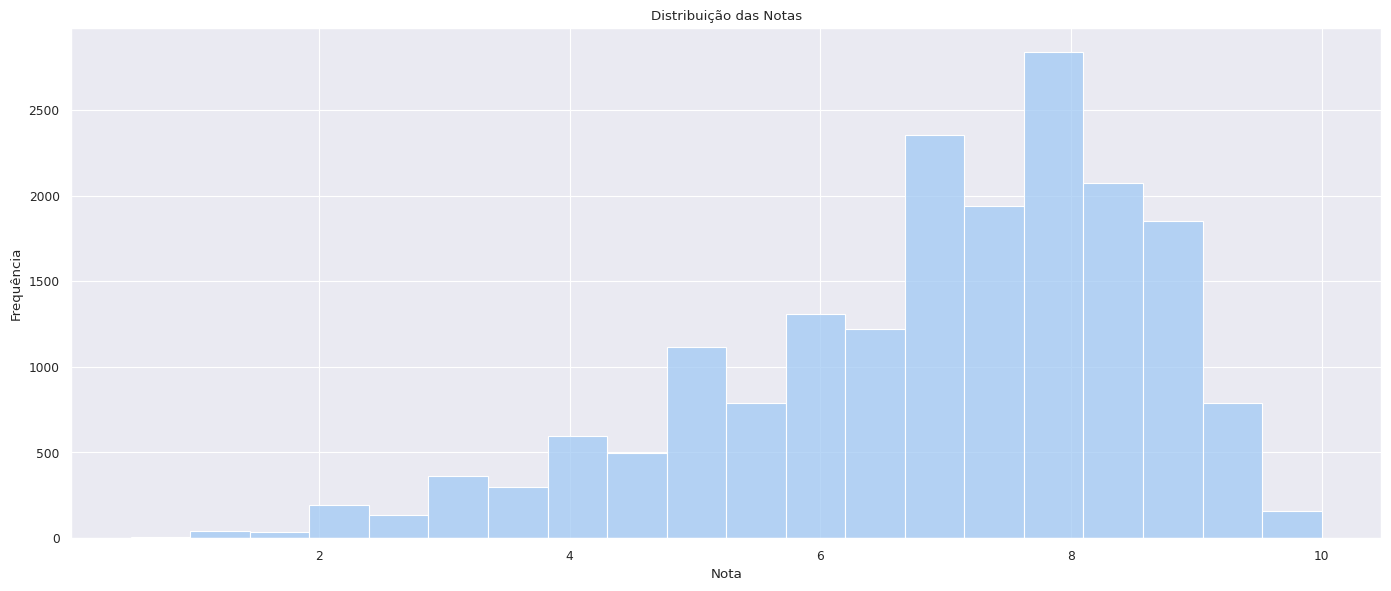

In [226]:
# Histograma para a distribuição das notas com cor pastel
plt.figure(figsize=(14, 6))
sns.histplot(df['Nota'], bins=20, kde=False, color=sns.color_palette("pastel")[0])
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

--- *Jogos x Década* ---

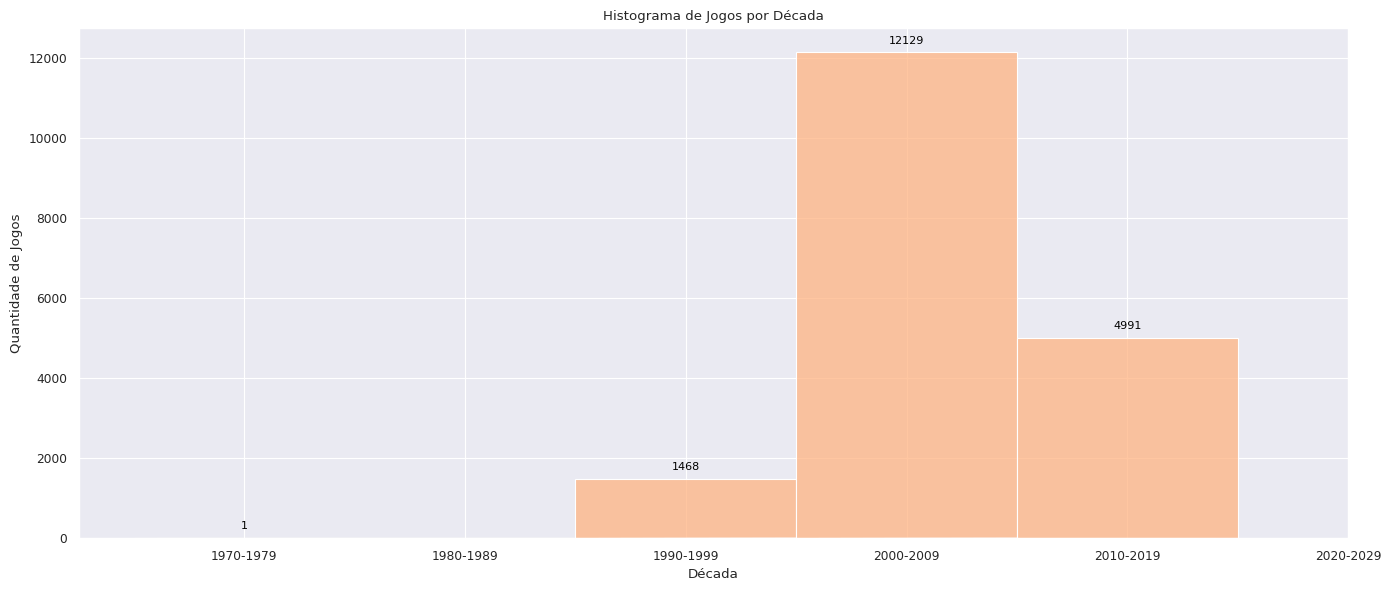

In [270]:
# Cria coluna adicional para década
df['Década de Lançamento'] = (df['Ano de Lançamento'] // 10) * 10

# Define o tamanho da figura
plt.figure(figsize=(14, 6))

# Plota o histograma com barras unidas, ajustando binwidth, discrete e shrink
ax = sns.histplot(df['Década de Lançamento'], binwidth=10, color=sns.color_palette("pastel")[1], kde=False, discrete=True, shrink=10)

# Ajusta o eixo X para exibir cada década
max_ano = df['Ano de Lançamento'].max()
ax.set_xticks(range(1970, max_ano + 10, 10))  # Ajusta o range para incluir a última década
ax.set_xticklabels([f'{i}-{i+9}' for i in range(1970, max_ano + 10, 10)])  # Define rótulos de década

# Exibe as contagens acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=8, color='black',
                    xytext=(0, 5), textcoords='offset points')

# HISTOGRAMA de jogos por década
plt.title('Histograma de Jogos por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade de Jogos')
plt.tight_layout()
plt.show()

--- *Maior quantidade de jogos na década de 2000-2009* ---

A alta quantidade de lançamentos de jogos entre 2000 e 2009 pode ser explicada por uma combinação de fatores, como:
*Popularização de Consoles e Computadores Domésticos*
* Nos anos 2000, consoles populares como o PlayStation 2, Xbox, Nintendo GameCube, e mais tarde o Xbox 360 e PlayStation 3, tiveram um enorme sucesso de vendas. O PlayStation 2, lançado em 2000, tornou-se o console mais vendido de todos os tempos.
* A melhoria no hardware dos PCs e o aumento do acesso à internet também expandiram o mercado de jogos para computador, incluindo jogos online e MMOs, como World of Warcraft (2004).

*Acesso à Internet e Popularização dos Jogos Online*
* O acesso à internet de banda larga se tornou mais comum, facilitando jogos online e promovendo gêneros como shooters e jogos multiplayer. Jogos como Counter-Strike e World of Warcraft tiveram grandes comunidades de jogadores e incentivaram mais lançamentos para aproveitar essa demanda crescente.

*Diversificação dos Gêneros e Público Alvo*
* Houve grande diversificação nos tipos de jogos e no público alvo, desde jogos casuais para novos públicos até jogos complexos para os mais experientes. Com o crescimento dos jogos portáteis e dispositivos móveis, principalmente com o lançamento do Nintendo DS e do PlayStation Portable (PSP), o mercado alcançou uma base de jogadores muito mais ampla.

*Ascensão dos Jogos Independentes*
* Embora o boom dos jogos independentes tenha sido mais forte na década de 2010, os anos 2000 viram o surgimento de desenvolvedores menores que aproveitavam plataformas digitais para distribuir seus jogos, como o Xbox Live Arcade no Xbox 360 e o Steam no PC (lançado em 2003).

*Facilidade de Desenvolvimento e Ferramentas de Distribuição Digital*
* Ferramentas de desenvolvimento e engines de jogos tornaram-se mais acessíveis, como a Unity (lançada em 2005), facilitando o desenvolvimento de jogos. Além disso, o Steam e outras plataformas digitais permitiram que estúdios menores publicassem seus jogos sem precisar de uma editora.

--- *Jogos x Estação do Ano* ---

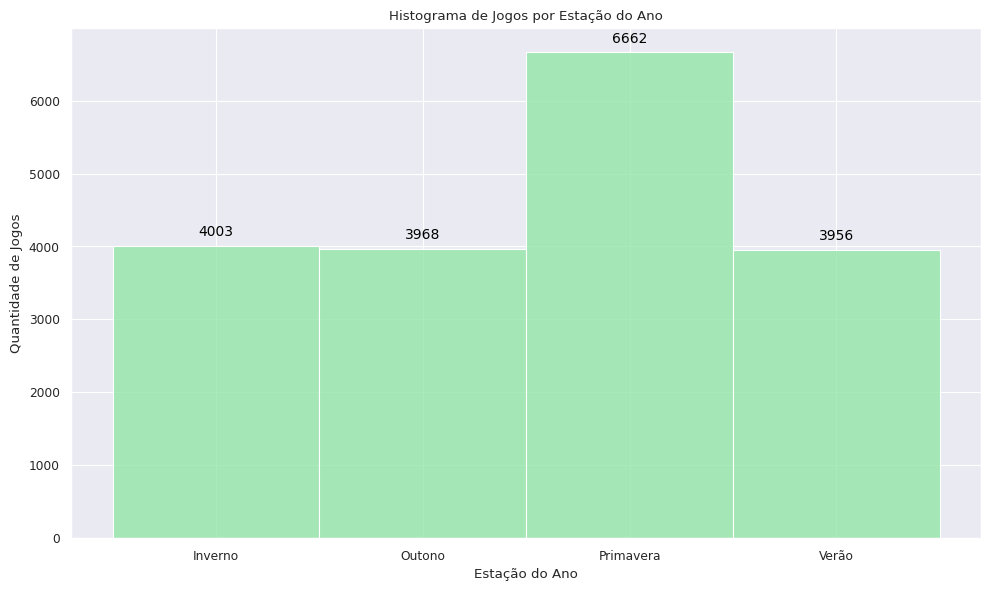

In [254]:
# Cria uma coluna para a estação do ano com base no mês de lançamento
def determinar_estacao(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    elif mes in [9, 10, 11]:
        return 'Primavera'

df['Estação de Lançamento'] = df['Mês de Lançamento'].apply(determinar_estacao)

# Configura o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plota o histograma de lançamentos por estação do ano
ax = sns.histplot(df['Estação de Lançamento'], discrete=True, color=sns.color_palette("pastel")[2])

# Exibe as contagens acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

# HISTOGRAMA de jogos por estação do ano
plt.title('Histograma de Jogos por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Quantidade de Jogos')
plt.tight_layout()
plt.show()

--- *Maior quantidade de jogos lançados na primavera* ---

A predominância de lançamentos na primavera (nos meses de setembro, outubro e novembro nos EUA) pode estar ligada a alguns fatores estratégicos:

*Preparação para as Festas de Fim de Ano*
* A primavera no hemisfério norte é imediatamente anterior à temporada de festas de fim de ano, que inclui datas como a Black Friday e o Natal, épocas propícias para maximizar as vendas pela alta demanda.

*Eventos e Convenções de Jogos*
* Grandes eventos da indústria, como a E3 (realizada em junho) e a Gamescom (em agosto), promovem muitos jogos para lançamento na primavera, criando um ambiente de expectativa que aumenta a visibilidade para lançamentos planejados para a estação.

*Jogos x Quinzena do Mês*

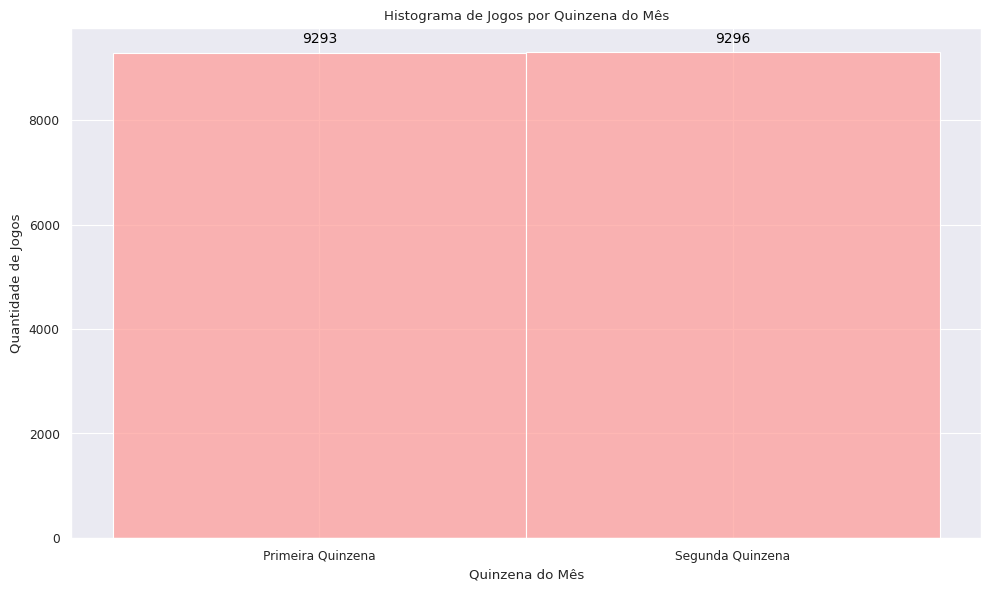

In [255]:
# Cria uma coluna para a quinzena do lançamento com base no dia de lançamento
df['Quinzena de Lançamento'] = df['Dia de Lançamento'].apply(lambda x: 'Primeira Quinzena' if x <= 15 else 'Segunda Quinzena')

# Configura o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plota o histograma de lançamentos por quinzena do mês
ax = sns.histplot(df['Quinzena de Lançamento'], discrete=True, color=sns.color_palette("pastel")[3])

# Exibe as contagens acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

# HISTOGRAMA de jogos por quinzena do mês
plt.title('Histograma de Jogos por Quinzena do Mês')
plt.xlabel('Quinzena do Mês')
plt.ylabel('Quantidade de Jogos')
plt.tight_layout()
plt.show()


# **CRIAÇÃO DO MODELO NÃO SUPERVISIONADO**

**OBJETIVO 1:** Agrupar Jogos Segundo Gênero, Plataforma e Nota

Para agrupar por características distintas, como gênero (categórica), plataforma (categórica) e nota (numérica), vamos usar K-Means após transformar os dados categóricos em uma representação numérica, como one-hot encoding.

*Pré-processamento*
Transformaremos variáveis categóricas (Gênero, Plataforma) em variáveis numéricas usando one-hot encoding e normalizar a nota.

In [272]:
# One-hot encoding para gênero e plataforma, normalização da nota
df_encoded = pd.get_dummies(df[['Gênero', 'Plataforma']])
df_encoded['Nota'] = df['Nota']
scaler = StandardScaler()
df_encoded[['Nota']] = scaler.fit_transform(df_encoded[['Nota']])

NameError: name 'StandardScaler' is not defined

*Aplicação do K-Means*
Escolheremos o número de clusters e treinaremos o modelo para identificar grupos de jogos com características semelhantes.